#Stock Market Prediction and Forecasting Using Stacked LSTM

In [262]:
#Keras and Tensorflow > 2.0

In [263]:
# Data Collection
import pandas_datareader as pdr

In [264]:
key = '8138a60a6bcc7cdfa486834b128d5ce3c3a3e417'

In [265]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
#df = pdr.get_data_tiingo('https://api.tiingo.com/tiingo/crypto/prices?tickers=Binance&startDate=2019-01-02&resampleFreq=5min')

/usr/local/lib/python3.9/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


4TY5S71DRVXKXQHZ
Alpha Vantage Support

In [266]:
df.to_csv('AAPL.csv')
#df.to_csv('Binance.csv')

In [267]:
import pandas as pd

In [268]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-03-27 00:00:00+00:00  168.34  175.15  166.92  173.68  38962839   
       2018-03-28 00:00:00+00:00  166.48  170.02  165.19  167.25  41668545   
       2018-03-29 00:00:00+00:00  167.78  171.75  166.90  167.81  38398505   
       2018-04-02 00:00:00+00:00  166.68  168.94  164.47  166.64  37586791   
       2018-04-03 00:00:00+00:00  168.39  168.75  164.88  167.64  30278046   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-03-27 00:00:00+00:00  40.066198  41.687030  39.728227  41.337159   
       2018-03-28 00:00:00+00:00  39.623504  40.466051  39.316474  39.806770   
       2018-03-29 00:00:00+00:00  39.932914  40.877804  39.723467  39.940054   
       2018-04-02 00:00:00+00:00  39.671106  40.209003  39.145109  39.661585   
       2018-04-03 00:00:00+00:00  40.078099  40.163781  39.242692  39.899593   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-03-27 00:00:00+00:00  155851356      0.0          1.0  
       2018-03-28 00:00:00+00:00  166674180      0.0          1.0  
       2018-03-29 00:00:00+00:00  153594020      0.0          1.0  
       2018-04-02 00:00:00+00:00  150347164      0.0          1.0  
       2018-04-03 00:00:00+00:00  121112184      0.0          1.0

In [269]:
df.tail()

close      high     low    open    volume  \
symbol date                                                                    
AAPL   2023-03-20 00:00:00+00:00  157.40  157.8200  154.15  155.07  73641415   
       2023-03-21 00:00:00+00:00  159.28  159.4000  156.54  157.32  73938285   
       2023-03-22 00:00:00+00:00  157.83  162.1400  157.81  159.30  75701811   
       2023-03-23 00:00:00+00:00  158.93  161.5501  157.68  158.83  67622060   
       2023-03-24 00:00:00+00:00  160.25  160.3400  157.85  158.86  59256343   

                                  adjClose   adjHigh  adjLow  adjOpen  \
symbol date                                                             
AAPL   2023-03-20 00:00:00+00:00    157.40  157.8200  154.15   155.07   
       2023-03-21 00:00:00+00:00    159.28  159.4000  156.54   157.32   
       2023-03-22 00:00:00+00:00    157.83  162.1400  157.81   159.30   
       2023-03-23 00:00:00+00:00    158.93  161.5501  157.68   158.83   
       2023-03-24 00:00:00+00:00    160.25  160.3400  157.85   158.86   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-03-20 00:00:00+00:00   73641415      0.0          1.0  
       2023-03-21 00:00:00+00:00   73938285      0.0          1.0  
       2023-03-22 00:00:00+00:00   75701811      0.0          1.0  
       2023-03-23 00:00:00+00:00   67622060      0.0          1.0  
       2023-03-24 00:00:00+00:00   59256343      0.0          1.0

In [270]:
df1 = df.reset_index() ['close']

In [271]:
df1.shape

(1258,)

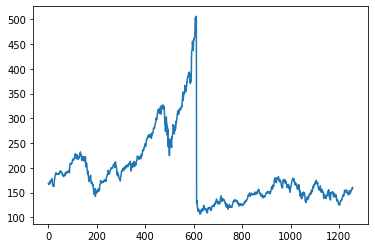

In [272]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to the scale of the data. So we apply MinMax scaler

In [273]:
import numpy as np

In [274]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [275]:
df1.shape

(1258, 1)

In [276]:
import numpy
#converting the array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step):
    a = dataset[i:(i+time_step), 0]  # 1,2,3 ... 100 where y will get 101 value
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [277]:
#Spliting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [278]:
# reshape into X=t, t+1, t+2, t+3 and then Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [279]:
print(X_train)

[[0.15403882 0.14938009 0.15263619 ... 0.2577583  0.2589856  0.26670006]
 [0.14938009 0.15263619 0.14988103 ... 0.2589856  0.26670006 0.27737007]
 [0.15263619 0.14988103 0.15416406 ... 0.26670006 0.27737007 0.27206011]
 ...
 [0.0882154  0.07576706 0.06291797 ... 0.05838447 0.06249217 0.05916093]
 [0.07576706 0.06291797 0.06837821 ... 0.06249217 0.05916093 0.06376957]
 [0.06291797 0.06837821 0.0705072  ... 0.05916093 0.06376957 0.06797746]]


In [280]:
len(test_data)

441

In [281]:
print(X_test.shape), print(ytest.shape)

(341, 100)
(341,)


(None, None)

Data Preparation process is over.
Next we need to create LSTM model

In [282]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [283]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_22 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [284]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [285]:
model.fit(X_train,y_train,validation_data=(X_test,ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 120ms/step - loss: 0.0352 - accuracy: 0.0014 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0129 - accuracy: 0.0028 - val_loss: 6.6033e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0095 - accuracy: 0.0028 - val_loss: 6.2997e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0085 - accuracy: 0.0028 - val_loss: 3.9009e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0074 - accuracy: 0.0028 - val_loss: 3.6643e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0072 - accuracy: 0.0028 - val_loss: 4.3023e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0067 - accuracy: 0.0028 - v

In [286]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [287]:
## Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 6ms/step


In [288]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [289]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

226.3260899320295

In [290]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

155.65155822890242

In [291]:
#from sklearn.metrics import accuracy_score
#model_acc = accuracy_score(ytest, test_predict)

Since the value is around 157 the prediction might be good.

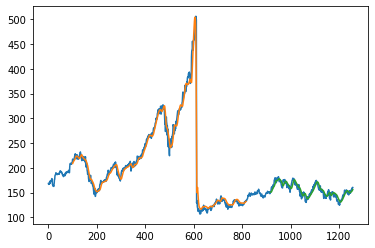

In [292]:
#Plotting
#shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predict for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df1), :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

We have predicted the output. And next we are going to be predicting the next future 30 days

In [293]:
len(test_data)

441

In [294]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [295]:
x_input=test_data[340:].reshape(1,-1)

In [296]:
x_input.shape

(1, 101)

In [297]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [298]:
len(temp_input)

101

In [299]:
from numpy import array

lst_output=[]
n_steps = 100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

0 day input [0.11646838 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066
 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461 0.10820288
 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354 0.11078272
 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976 0.10261741
 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587 0.09430182
 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957
 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193
 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447
 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823
 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.109

In [300]:
day_new = np.arange(1,100)
day_pred = np.arange(100,130)

In [301]:
import matplotlib.pyplot as plt

In [302]:
len(df1)

1258

In [303]:
df3 = df1.tolist()
df3.extend(lst_output)

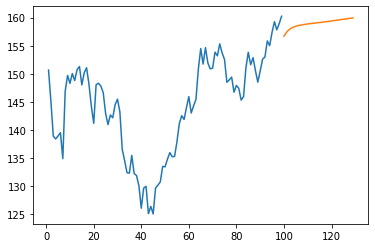

In [304]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))